# Create Latitude and Longitude Combinations


In [1]:
# Module 6.1.4
# By Emmanuel Martinez

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Found an error on Module 6.1.5 telling me the following: "API_practice file"

In [5]:
# Let's import the citipy script and practice using it. 
# In our "API_practice file", add a new cell and import the citipy.py script from the citipy module.

# But works on WeatherPy file, not over "API_practice file".

# Use the citipy module to determine city based on latitude and longitude.
# from citipy import citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

longyearbyen sj
punta arenas cl
sao joao da barra br
mar del plata ar
ngunguru nz
tiksi ru
punta arenas cl
zalesovo ru
hobart au
rogun tj
barcelos br
upernavik gl
narsaq gl
puerto ayora ec
snasa no
rikitea pf
langxiang cn
shimoda jp
ginir et
port blair in
ostrovnoy ru
jaisalmer in
mataura pf
tuatapere nz
de aar za
saint-joseph re
port blair in
camacupa ao
axim gh
mahendranagar np
paramonga pe
asau tv
haines junction ca
avarua ck
vaini to
hilo us
pevek ru
new norfolk au
castro cl
new norfolk au
kaitangata nz
saskylakh ru
rikitea pf
eyl so
jamestown sh
saskylakh ru
walvis bay na
hatillo us
east london za
esil kz
hobart au
port alfred za
barbastro es
puerto ayora ec
sechura pe
wanaka nz
cayenne gf
cidreira br
tuktoyaktuk ca
avarua ck
longyearbyen sj
airai pw
lolua tv
busselton au
hobart au
padang id
cockburn town tc
vagur fo
kerch ua
tiksi ru
taolanaro mg
ushuaia ar
ushuaia ar
bredasdorp za
chuy uy
laela tz
rikitea pf
mataura pf
atuona pf
faya td
ushuaia ar
georgetown sh
hasaki jp
alyangu

souillac mu
albany au
priladozhskiy ru
eldikan ru
lugovskiy ru
fortuna us
hermanus za
saint-philippe re
hermanus za
atuona pf
kapaa us
iqaluit ca
amahai id
ushuaia ar
hermanus za
bathsheba bb
luderitz na
ancud cl
nakhon thai th
bluff nz
constitucion mx
hami cn
isangel vu
arraial do cabo br
charkhi dadri in
ust-kuyga ru
raudeberg no
rikitea pf
san cristobal ec
hermanus za
kameoka jp
cherskiy ru
mataura pf
hermanus za
kavieng pg
avarua ck
utena lt
tabarqah tn
pachperwa in
margate za
bethel us
georgetown sh
mataura pf
punta arenas cl
atuona pf
mar del plata ar
tasiilaq gl
opunake nz
rikitea pf
usinsk ru
launceston au
nemuro jp
ballina ie
puerto cabezas ni
livingston us
batagay ru
tomatlan mx
hilo us
arraial do cabo br
araouane ml
umm durman sd
ushuaia ar
ushuaia ar
ust-nera ru
bredasdorp za
bathsheba bb
bethel us
warqla dz
sabha jo
bredasdorp za
barabai id
hermanus za
lasa cn
mataura pf
mataura pf
vaini to
bredasdorp za
airai pw
new norfolk au
codrington ag
rikitea pf
bose cn
sann pk
atuo

loa janan id
cidreira br
agirish ru
katsuura jp
jamestown sh
carnarvon au
punta arenas cl
east london za
jalingo ng
jamestown sh
ilebo cd
blagoyevo ru
adrar dz
vaini to
katav-ivanovsk ru
taolanaro mg
upernavik gl
yeniseysk ru
arraial do cabo br
bajram curri al
stillwater us
cape town za
saint-pierre pm
rikitea pf
bluff nz
bluff nz
tilichiki ru
belushya guba ru
port elizabeth za


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [9]:
import requests
requests.__version__

'2.24.0'

# Get the City Weather Data

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | sao joao da barra
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | ngunguru
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | zalesovo
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | rogun
City not found. Skipping...
Processing Record 10 of Set 1 | barcelos
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | narsaq
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | snasa
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | langxiang
Processing Record 17 of Set 1 | shimoda
Processing Record 18 of Set 1 | ginir
Processing Record 19 of Set 1 | port blair
Processing Record 20 of Set 1 | ostrovnoy
Processing Record 21 of Set 1 | jaisalmer
Processing Record 22 of Set 1 | mataura
Proces

Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | mporokoso
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | plettenberg bay
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | hualmay
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | belaya gora
Processing Record 1 of Set 5 | beisfjord
Processing Record 2 of Set 5 | pontianak
Processing Record 3 of Set 5 | bintulu
Processing Record 4 of Set 5 | benghazi
Processing Record 5 of Set 5 | thio
Processing Record 6 of Set 5 | kaeo
Processing Record 7 of Set 5 | atar
Processing Record 8 of Set 5 | nuuk
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Set 5 | carnarvon
Processing Record 11 of Set 5 | sorong
Processing Record 12 of Set 5 | lagoa
Processing Record 13 of 

Processing Record 32 of Set 8 | mutare
Processing Record 33 of Set 8 | chumikan
Processing Record 34 of Set 8 | gari
Processing Record 35 of Set 8 | priladozhskiy
Processing Record 36 of Set 8 | eldikan
City not found. Skipping...
Processing Record 37 of Set 8 | lugovskiy
City not found. Skipping...
Processing Record 38 of Set 8 | amahai
Processing Record 39 of Set 8 | ancud
Processing Record 40 of Set 8 | nakhon thai
Processing Record 41 of Set 8 | constitucion
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | charkhi dadri
Processing Record 45 of Set 8 | ust-kuyga
Processing Record 46 of Set 8 | raudeberg
Processing Record 47 of Set 8 | san cristobal
Processing Record 48 of Set 8 | kameoka
Processing Record 49 of Set 8 | kavieng
Processing Record 50 of Set 8 | utena
Processing Record 1 of Set 9 | tabarqah
City not found. Skipping...
Processing Record 2 of Set 9 | pachperwa
Processing Record 3 of Set 9 | margate
Processing Rec

Processing Record 19 of Set 12 | mayo
Processing Record 20 of Set 12 | pangody
Processing Record 21 of Set 12 | yamada
Processing Record 22 of Set 12 | sitka
Processing Record 23 of Set 12 | havelock
Processing Record 24 of Set 12 | bhadrachalam
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | pucallpa
Processing Record 27 of Set 12 | bereda
Processing Record 28 of Set 12 | naze
Processing Record 29 of Set 12 | teeli
Processing Record 30 of Set 12 | maulvi bazar
City not found. Skipping...
Processing Record 31 of Set 12 | albert lea
Processing Record 32 of Set 12 | akdepe
Processing Record 33 of Set 12 | qaqortoq
Processing Record 34 of Set 12 | guerrero negro
Processing Record 35 of Set 12 | igrim
Processing Record 36 of Set 12 | elizabeth city
Processing Record 37 of Set 12 | asosa
Processing Record 38 of Set 12 | kousseri
Processing Record 39 of Set 12 | beloretsk
Processing Record 40 of Set 12 | eagle pass
Processing Record 41 of Set 12 | stornoway
Processing

In [17]:
len(city_data)

596

# Create a DataFrame of City Weather Data

In [20]:
# Module 6.2.7

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.22,15.64,24.80,68,75,14.99,SJ,2020-10-29 04:18:03
1,Punta Arenas,-53.15,-70.92,46.40,65,40,40.26,CL,2020-10-29 04:18:03
2,Sao Joao Da Barra,-21.64,-41.05,75.52,93,0,12.86,BR,2020-10-29 04:18:03
3,Mar Del Plata,-38.00,-57.56,51.01,81,0,9.17,AR,2020-10-29 04:15:38
4,Ngunguru,-35.62,174.50,66.99,84,92,8.99,NZ,2020-10-29 04:18:04
5,Tiksi,71.69,128.87,1.42,90,98,14.38,RU,2020-10-29 04:18:04
6,Zalesovo,53.99,84.74,24.64,92,100,15.50,RU,2020-10-29 04:18:04
7,Hobart,-42.88,147.33,63.00,42,40,12.75,AU,2020-10-29 04:17:44
8,Barcelos,41.54,-8.62,51.01,93,20,3.36,PT,2020-10-29 04:13:53
9,Upernavik,72.79,-56.15,14.68,85,99,10.83,GL,2020-10-29 04:18:04


In [22]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [23]:
city_data_df = city_data_df[new_column_order]

In [24]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2020-10-29 04:18:03,78.22,15.64,24.80,68,75,14.99
1,Punta Arenas,CL,2020-10-29 04:18:03,-53.15,-70.92,46.40,65,40,40.26
2,Sao Joao Da Barra,BR,2020-10-29 04:18:03,-21.64,-41.05,75.52,93,0,12.86
3,Mar Del Plata,AR,2020-10-29 04:15:38,-38.00,-57.56,51.01,81,0,9.17
4,Ngunguru,NZ,2020-10-29 04:18:04,-35.62,174.50,66.99,84,92,8.99
...,...,...,...,...,...,...,...,...,...
591,Katav-Ivanovsk,RU,2020-10-29 04:18:38,54.75,58.20,29.34,92,18,5.66
592,Yeniseysk,RU,2020-10-29 04:18:39,58.45,92.17,23.07,94,100,10.85
593,Bajram Curri,AL,2020-10-29 04:18:39,42.36,20.08,48.20,87,0,1.12
594,Stillwater,US,2020-10-29 04:13:55,36.12,-97.06,39.20,93,90,3.36


# Create an output file to save the DataFrame as a CSV in a new folder for that file.

In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603949771.3964403

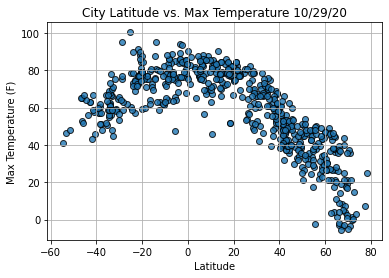

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# Plot Latitude vs. Humidity

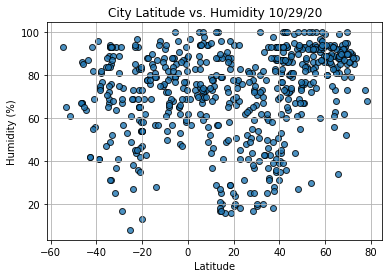

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot Latitude vs. Cloudiness

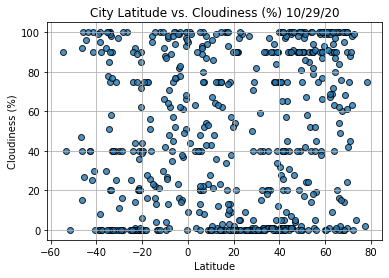

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Plot Latitude vs. Wind Speed

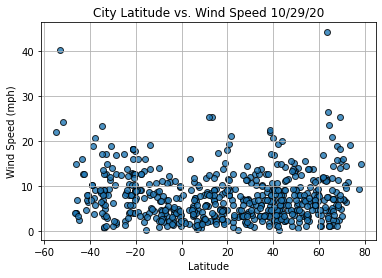

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()